# 🌀 Phase Kickback na Computação Quântica  
### Uma Demonstração Prática com Qiskit

## 🎯 Objetivo

Demonstrar o fenômeno de **phase kickback**, onde uma rotação de fase controlada (`CRZ(θ)`) aplicada ao **qubit alvo** afeta — de forma contraintuitiva — o **qubit de controle**. Isso evidencia a natureza **unitária e reversível** da computação quântica.

---

## 🧠 Contexto Teórico

Na computação clássica, a informação flui do **controle para o alvo**.  
Na computação quântica, se o controle está em **superposição**, uma porta como `CRZ(θ)` pode refletir a **fase** aplicada ao alvo de volta para o controle.

Esse fenômeno é o **phase kickback** (*recuo de fase*), e é essencial para muitos algoritmos quânticos.

---

## ⚙️ Etapas do Experimento

1. **Criar um circuito com 2 qubits:**
   - Controle: superposição $((|0⟩ + |1⟩)/\sqrt{2})$
   - Alvo: estado $|1⟩$

2. **Aplicar `CRZ(θ)`** (rotação de fase condicional no alvo)

3. **Observar o kickback:**
   - A fase aplicada ao alvo reflete no controle

4. **Aplicar Hadamard final no controle:**
   - Torna a fase mensurável como diferença de probabilidade

5. **Visualizar:**
   - Histogramas de medição
   - Vetor de estado
   - Esfera de Bloch

---

## 🚀 Aplicações

O phase kickback é a base de algoritmos como:

- **Quantum Phase Estimation (QPE)**
- **Algoritmo de Shor**
- **Simulações de química quântica**


In [1]:
# Bibliotecas
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector

# Ativa gráficos inline (para notebooks)
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)

Estado inicial |00⟩:


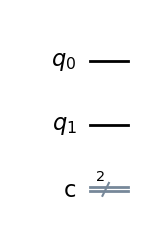

In [2]:
# ===============================================
# Estado inicial |00>
# ===============================================

print("Estado inicial |00⟩:")
#Criar circuito quantico com 2 qubits e 2 registradores classicos
qc = QuantumCircuit(2,2)

#Visualização gráfica do circuito
qc.draw('mpl');

## Statevector

O *statevector* (vetor de estado) descreve completamente o estado quântico de um sistema.

Cada número complexo no vetor representa a **amplitude de probabilidade** associada a um dos estados básicos do sistema de 2 qubits:

$$
|00⟩,\quad |01⟩,\quad |10⟩,\quad |11⟩
$$

As amplitudes determinam a chance de colapsar em cada estado ao fazer uma medição.


---

**Mapeamento do Vetor de Estado**

| Índice | Estado | Amplitude         | Probabilidade |
|--------|--------|-------------------|---------------|
| 0      | $\lvert 00⟩$ | $1.0 + 0.0j$     | 100%          |
| 1      | $\lvert 01⟩$ | $0.0 + 0.0j$     | 0%            |
| 2      | $\lvert 10⟩$ | $0.0 + 0.0j$     | 0%            |
| 3      | $\lvert 11⟩$ | $0.0 + 0.0j$     | 0%            |

In [3]:
#Visualização do estado do vector
initial_state = Statevector.from_instruction(qc)

print("Statevector inicial:")
print(initial_state)

Statevector inicial:
Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


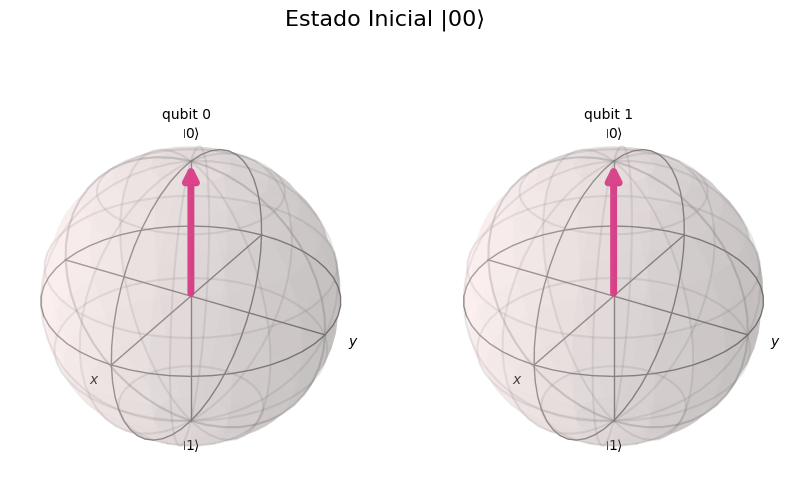

In [4]:
#Visualização na Bloch Sphere dos vectores
plot_bloch_multivector(initial_state, title="Estado Inicial |00⟩");

### Aplicar H no controle e X no alvo


**Operações Aplicadas:**

- Aplicamos **Hadamard (H)** no **qubit de controle** (q₀) → ele entra em superposição:  
  $$
  |+\rangle = \frac{|0⟩ + |1⟩}{\sqrt{2}}
  $$
- Aplicamos **X** no **qubit alvo** (q₁) → ele altera o valor do qubit de $|0⟩$ para:
  $$|1⟩$$ 

---

**Estado do Sistema Após as Operações H e X:**

O estado conjunto do sistema (2 qubits) é:

$$|\psi\rangle_{\text{antes}}  =  \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \otimes |1\rangle  =  \frac{1}{\sqrt{2}}(|0\rangle|1\rangle + |1\rangle|1\rangle)$$ 

Simplificando:

$$
|\psi⟩ = \frac{|0⟩|1⟩ + |1⟩|1⟩}{\sqrt{2}}
$$

---


Isso significa:

- O **controle** (q₀) está em superposição.
- O **alvo** (q₁) está fixo no estado $|1⟩$.

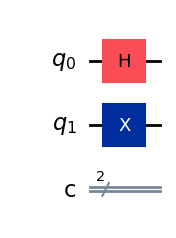

In [5]:
# ===============================================
# Aplicar H no controle e X no alvo
# ===============================================

qc.h(0)  #coloca q0 em superposição: (|0⟩ + |1⟩)/√2
qc.x(1)  #coloca q1 em |1⟩

#Visualização gráfica do circuito
qc.draw('mpl');

In [6]:
#Visualização do estado do vector
print("Statevector após H e X:")

after_hx_state = Statevector.from_instruction(qc)
print(after_hx_state)

Statevector após H e X:
Statevector([0.        +0.j, 0.        +0.j, 0.70710678+0.j,
             0.70710678+0.j],
            dims=(2, 2))


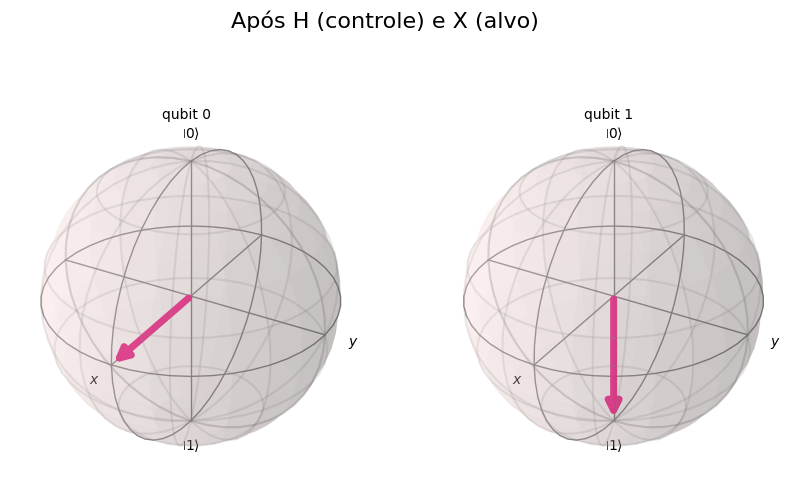

In [7]:
#Visualização dos vetores na Bloch Sphere
plot_bloch_multivector(after_hx_state, title="Após H (controle) e X (alvo)");

### Como acontece o Phase Kickback

Antes da aplicação da porta `CRZ(θ)`, o estado combinado dos qubits é:

$$
|\psi⟩ = \frac{|0⟩|1⟩ + |1⟩|1⟩}{\sqrt{2}}
$$

---


**Aplicando `CRZ(θ)`**

- No termo $|0⟩|1⟩$:  
  ➤ Nada acontece, porque o controle está em $|0⟩$, e a porta controlada não é ativada.

- No termo $|1⟩|1⟩$:  
  ➤ A porta **aplica uma fase**:  
  $$
  |1⟩|1⟩ \rightarrow e^{iθ}|1⟩|1⟩
  $$

---

**Estado Após a CRZ(θ):**

$$
|\psi⟩ = \frac{|0⟩ \otimes |1⟩ + e^{iθ}|1⟩ \otimes |1⟩}{\sqrt{2}}
$$

Fatorando o $|1⟩$ do qubit alvo:

$$
|\psi⟩ = \left( \frac{|0⟩ + e^{iθ}|1⟩}{\sqrt{2}} \right) \otimes |1⟩
$$

---

**Estado Final:**

- **Qubit de controle (q₀):**
  $$
  \frac{|0⟩ + e^{iθ}|1⟩}{\sqrt{2}}
  $$
  ➤ A fase $(e^{i\theta})$ apareceu no controle — este é o **kickback**!

- **Qubit alvo (q₁):**
  $$
  |1⟩
  $$
  ➤ Permanece inalterado, pois $|1⟩$ é um autoestado da rotação **RZ(θ)**.

---

=== Aplicar CRZ(θ) ===


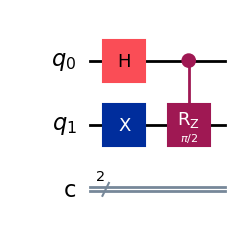

In [8]:
# ===============================================
# Aplicar CRZ(theta)
# ===============================================
print("=== Aplicar CRZ(θ) ===")
#Define o ângulo de fase (kickback)
theta = np.pi / 2  #define angulo theta 90 graus
qc.crz(theta, 0, 1)  #coloca controle em q0 e alvo q1

#Visualização gráfica do circuito
qc.draw('mpl');

In [9]:
#Visualização do estado do vector
final_state = Statevector.from_instruction(qc)

print("Estado final após CRZ:")
print(final_state)

Estado final após CRZ:
Statevector([0.        +0.j , 0.        +0.j , 0.70710678+0.j ,
             0.5       +0.5j],
            dims=(2, 2))


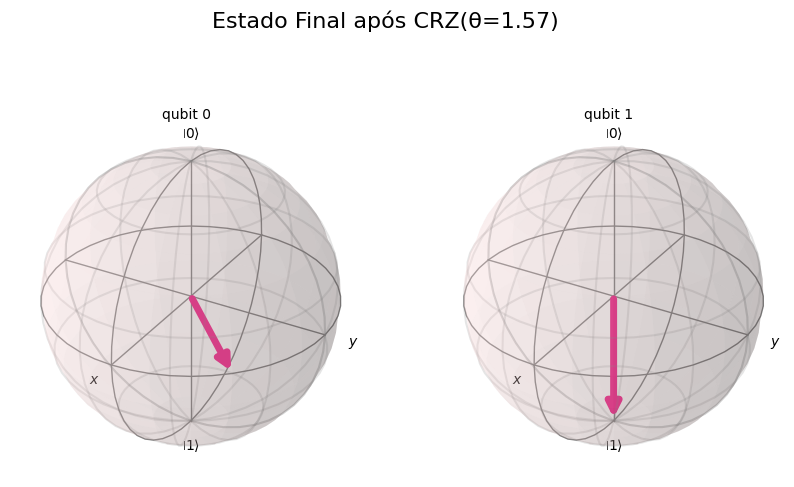

In [10]:
#Visualização na Bloch Sphere dos vectores
plot_bloch_multivector(final_state, title=f"Estado Final após CRZ(θ={theta:.2f})");

###  Resultado Final

$$
|\psi_{\text{final}}\rangle = \frac{|0\rangle + e^{i\theta}|1\rangle}{\sqrt{2}} \otimes |1\rangle
$$

A fase $(e^{i\theta})$ foi **"refletida" no qubit de controle** — mesmo tendo sido aplicada no qubit alvo — devido ao **phase kickback**.


### Análise das Distribuições de Probabilidade com AerSimulator

O AerSimulator é um simulador de circuitos quânticos fornecido pelo Qiskit, que é o módulo de simulação da biblioteca Qiskit (desenvolvida pela IBM). Ele permite executar circuitos quânticos em um ambiente simulado, ou seja, sem usar um computador quântico real.

Agora que entendemos como o **phase kickback** transfere a fase do qubit alvo para o qubit de controle, vamos simular o circuito completo utilizando o `AerSimulator()`.

Nosso objetivo é:

- Observar a **distribuição de probabilidades** após o circuito, com e sem a aplicação do segundo Hadamard.
- Ver como a **fase introduzida** afeta a chance de medir `|0⟩` ou `|1⟩` no qubit de controle.
- Confirmar, na prática, que o Hadamard final é essencial para **converter a fase invisível** em uma diferença **mensurável** nas probabilidades.

Isso nos permite estimar a fase com base nas estatísticas de medição — o princípio central do **algoritmo de estimativa de fase quântica (PEA)**.


Circuito Anterior com Medidores:


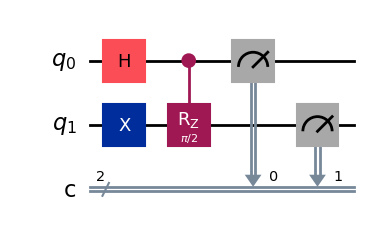

In [11]:
#Criar uma copia do circuito anterior
qc_measure = qc.copy()

#Adicionar a medição em ambos os qubits para coletar as probabilidades
qc_measure.measure([0, 1], [0, 1])

#Visualização gráfica do circuito
print("Circuito Anterior com Medidores:")
qc_measure.draw('mpl');

Resultados das medições:


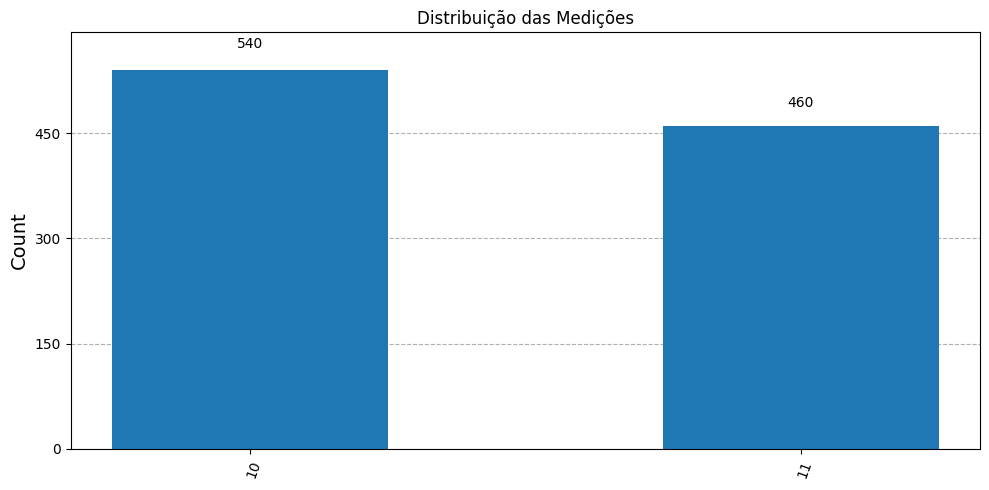

In [12]:
# =================================================================
# SIMULAR O CIRCUITO
# =================================================================
#Define Simulador
simulator = AerSimulator()

#Executar a simulação
job = simulator.run(qc_measure, shots=1000)
result = job.result()
counts = result.get_counts()

#Visualização da probabilidade das medições
print("Resultados das medições:")
plot_histogram(counts, title="Distribuição das Medições")
plt.show()

### Por que a fase não aparece nas medições diretas?

Após aplicar a porta `CRZ(θ)`, o qubit de controle fica no estado:

$$
|\psi\rangle = \frac{1}{\sqrt{2}} \left( |0\rangle + e^{i\theta}|1\rangle \right)
$$

A fase $(e^{i\theta})$ **não altera as probabilidades de medição**, pois o módulo de cada componente permanece o mesmo:

$$
P(0) = \left| \frac{1}{\sqrt{2}} \right|^2 = \frac{1}{2}
$$

$$
P(1) = \left| \frac{e^{i\theta}}{\sqrt{2}} \right|^2 = \frac{1}{2}
$$

Ou seja, as probabilidades de medir $( |0\rangle)$ ou $(|1\rangle)$ são **iguais**: 50% para cada.  
A fase está **oculta** no estado quântico e **não pode ser observada diretamente** via medição clássica.

### Como Recuperar a informação da alteração de fase

Outra Hadamard transforma **fase em amplitude**, e aí sim a fase afeta a **probabilidade de medição**!

---

#### O Hadamard age assim


Sabemos que:

- $H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$  
- $H|1\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$

Logo:

$$
H|\psi\rangle = H\left( \frac{1}{\sqrt{2}} (|0\rangle + e^{i\theta}|1\rangle) \right)
$$

Distribuindo:

$$
H|\psi\rangle = \frac{1}{\sqrt{2}} \left[
\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) + e^{i\theta} \cdot \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)
\right]
$$

Simplificando:

$$
H|\psi\rangle = \frac{1}{2} \left[ (1 + e^{i\theta})|0\rangle + (1 - e^{i\theta})|1\rangle \right]
$$

---

#### Probabilidades após o Hadamard

- Probabilidade de medir $|0\rangle$:

$$
P(0) = \left| \frac{1 + e^{i\theta}}{2} \right|^2 = \cos^2\left(\frac{\theta}{2}\right)
$$

- Probabilidade de medir $|1\rangle$:

$$
P(1) = \left| \frac{1 - e^{i\theta}}{2} \right|^2 = \sin^2\left(\frac{\theta}{2}\right)
$$

---

- Antes do Hadamard: a fase $\theta$ **não afetava a medição**.
- Depois do Hadamard: a fase $\theta$ **modifica diretamente a probabilidade** de medir $|0\rangle$ ou $|1\rangle$.

Esse é o truque por trás do **phase kickback** e do **algoritmo de estimativa de fase**.

Circuito anterior adicionado porta H no qubit 0:


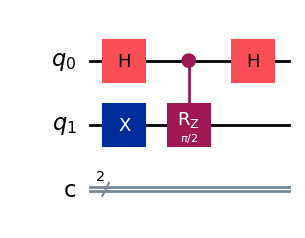

In [13]:
#Criar uma copia do circuito anterior
qc_h_final = qc.copy()

#Adiciona Hadamard ao qubit de controle para converter fase em amplitude 
qc_h_final.h(0)

#Visualização gráfica do circuito
print("Circuito anterior adicionado porta H no qubit 0:")
qc_h_final.draw('mpl');

In [14]:
#Visualização do estado do vector
statevector = Statevector.from_instruction(qc_h_final)

print("Estado final após H final:")
print(statevector)

Estado final após H final:
Statevector([0.        +0.j        , 0.        +0.j        ,
             0.85355339+0.35355339j, 0.14644661-0.35355339j],
            dims=(2, 2))


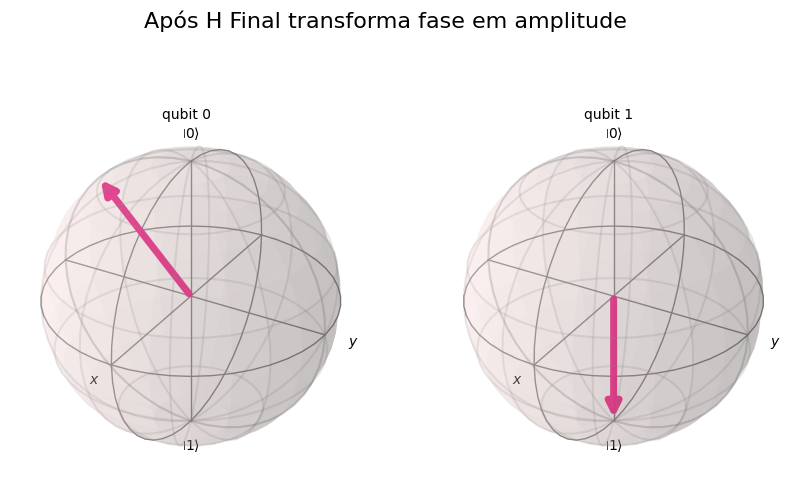

In [15]:
#Visualização dos vetores na Bloch Sphere
plot_bloch_multivector(statevector, title="Após H Final transforma fase em amplitude");

Circuito Anterior com Medidores:


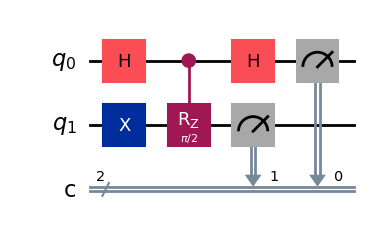

In [16]:
#Adicionar a medição em ambos os qubits para coletar as probabilidades
qc_h_final.measure([0, 1], [0, 1])

#Visualização gráfica do circuito
print("Circuito Anterior com Medidores:")
qc_h_final.draw('mpl');

Resultados das medições:


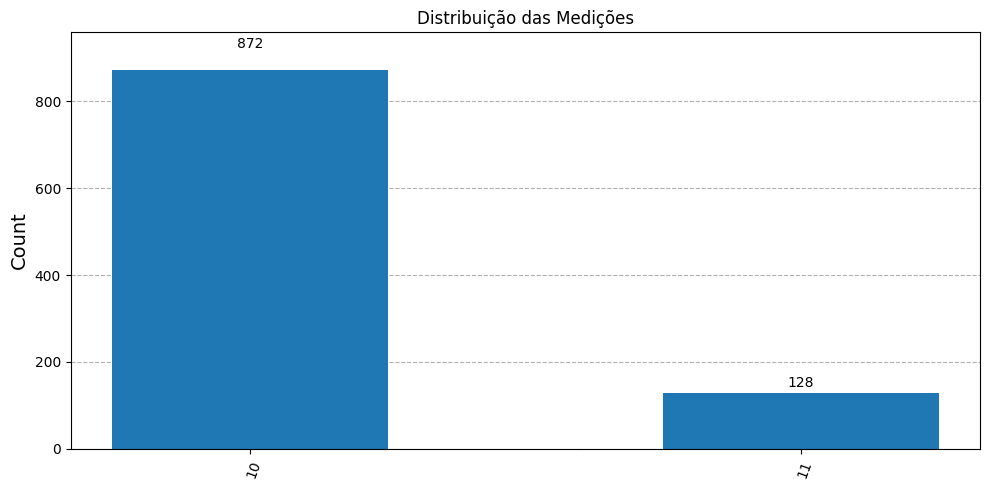

In [17]:
# ===============================================
# SIMULAR O CIRCUITO
# ===============================================
#Define Simulador
simulator = AerSimulator()

#Executar a simulação
job = simulator.run(qc_h_final, shots=1000)
result = job.result()
counts = result.get_counts()

#Visualização da probabilidade das medições
print("Resultados das medições:")
plot_histogram(counts, title="Distribuição das Medições")
plt.show()

## Conclusão

Como vimos, ao aplicar uma CRZ(θ) com o qubit de controle em superposição, o qubit de controle "absorve" a fase aplicada ao alvo. Isso evidencia o fenômeno de phase kickback.

A aplicação de um Hadamard final no controle permite visualizar essa fase como uma diferença de probabilidade entre os estados |0⟩ e |1⟩.

Esse comportamento é essencial em algoritmos como QPE e Shor, onde a fase precisa ser extraída com precisão do sistema.


## Additional Information

**Created by:** Diego Saran  
**Version:** 1.0   
**Based on:** Concepts from Quantum Computing with Qiskit       
**License:** MIT 
**Date:** July 2025

In [ ]:
import qiskit
import qiskit_ibm_runtime

print(f'Qiskit: {qiskit.__version__}')
print(f'Qiskit IBM Runtime: {qiskit_ibm_runtime.__version__}')